# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [6]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [7]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [8]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [9]:

num_df = app_train[[ e  for e in app_train.columns if app_train[e].dtype != "object"]]
num_df.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.095213,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.293509,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
for e in num_df.columns:
   print(e)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MOD

In [11]:
print(app_train[app_train.AMT_INCOME_TOTAL!=0].AMT_INCOME_TOTAL.describe()) 
#AMT_CREDIT AMT_REQ_CREDIT_BUREAU_MON/AMT_INCOME_TOTAL
#app_train[app_train.AMT_INCOME_TOTAL ].AMT_INCOME_TOTAL.hist()
app_train[app_train.AMT_INCOME_TOTAL.isnull()].AMT_INCOME_TOTAL

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


Series([], Name: AMT_INCOME_TOTAL, dtype: float64)

In [12]:
app_train['AMT_INCOME_TOTAL_10_group'] = pd.qcut(app_train.AMT_INCOME_TOTAL,10)
app_train['AMT_INCOME_TOTAL_10_group'].value_counts()

(112500.0, 135000.0]       48849
(180000.0, 225000.0]       44809
(99000.0, 112500.0]        36907
(25649.999, 81000.0]       33391
(147150.0, 162000.0]       31120
(162000.0, 180000.0]       30704
(81000.0, 99000.0]         30280
(270000.0, 117000000.0]    27161
(225000.0, 270000.0]       19957
(135000.0, 147150.0]        4333
Name: AMT_INCOME_TOTAL_10_group, dtype: int64

[Interval(25649.999, 81000.0, closed='right'), Interval(81000.0, 99000.0, closed='right'), Interval(99000.0, 112500.0, closed='right'), Interval(112500.0, 135000.0, closed='right'), Interval(135000.0, 147150.0, closed='right'), Interval(147150.0, 162000.0, closed='right'), Interval(162000.0, 180000.0, closed='right'), Interval(180000.0, 225000.0, closed='right'), Interval(225000.0, 270000.0, closed='right'), Interval(270000.0, 117000000.0, closed='right')]


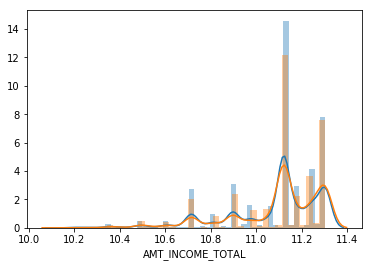

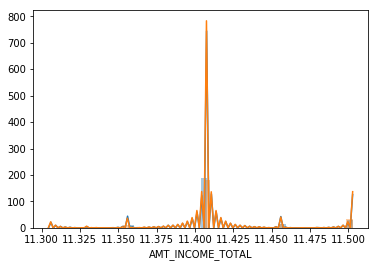

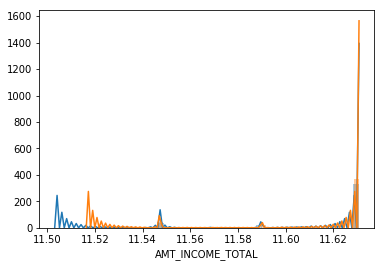

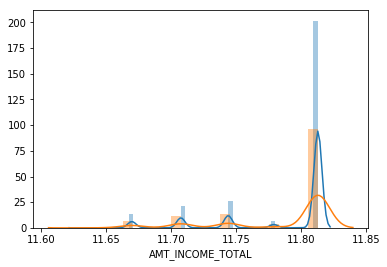

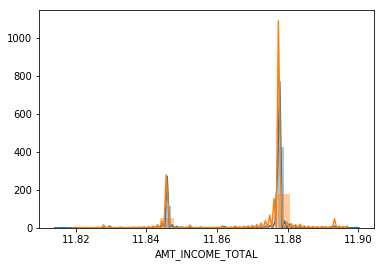

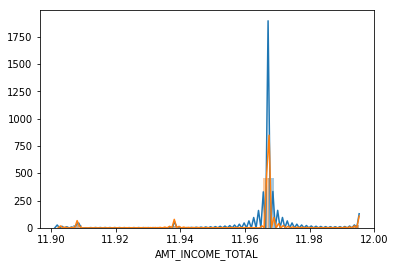

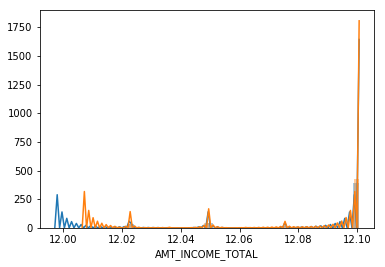

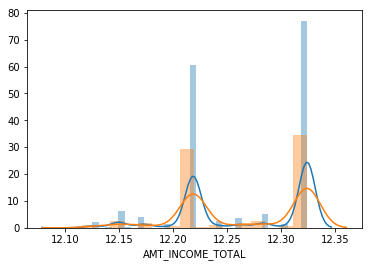

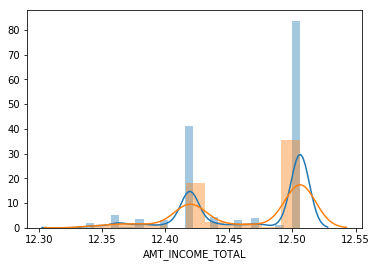

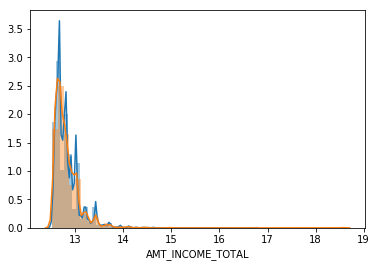

In [23]:
import seaborn as sns # 另一個繪圖-樣式套件
##note : order

cat_data = list(app_train.AMT_INCOME_TOTAL_10_group.unique())
sort_cat= sorted(cat_data,key = lambda x:x.left)
print(sort_cat)
for i in range(len(sort_cat)):
        sns.distplot(np.log(app_train.loc[(app_train['AMT_INCOME_TOTAL_10_group'] == sort_cat[i]) & \
                              (app_train['TARGET'] == 0), 'AMT_INCOME_TOTAL']), label = str(sort_cat[i]))
        sns.distplot(np.log(app_train.loc[(app_train['AMT_INCOME_TOTAL_10_group'] == sort_cat[i]) & \
                              (app_train['TARGET'] == 1), 'AMT_INCOME_TOTAL']), label = str(sort_cat[i]))
        plt.show()
#[_.left for _ in t]
plt.show()

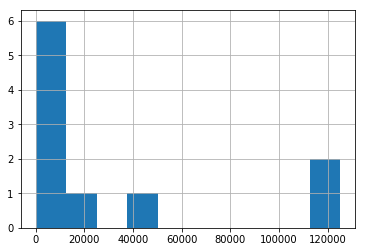

In [51]:
#app_train.AMT_CREDIT.hist()
x = pd.cut(app_train.AMT_CREDIT,10)
x.value_counts().sort_index().hist()
app_train['AMT_CREDIT_gp10'] = pd.cut(app_train.AMT_CREDIT,10)

In [101]:
print(app_train.AMT_REQ_CREDIT_BUREAU_MON.value_counts())
cut_r = list(range(17))
cut_r.append(int(app_train.AMT_REQ_CREDIT_BUREAU_MON.max()))
print(cut_r)
app_train['AMT_REQ_CREDIT_BUREAU_MON_gp'] = pd.cut(app_train.AMT_REQ_CREDIT_BUREAU_MON,bins= cut_r,include_lowest= True)
app_train['AMT_REQ_CREDIT_BUREAU_MON_gp'].value_counts() 

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 27]


(-0.001, 1.0]    255380
(1.0, 2.0]         5386
(2.0, 3.0]         1991
(3.0, 4.0]         1076
(4.0, 5.0]          602
(5.0, 6.0]          343
(6.0, 7.0]          298
(8.0, 9.0]          206
(7.0, 8.0]          185
(9.0, 10.0]         132
(10.0, 11.0]        119
(11.0, 12.0]         77
(12.0, 13.0]         72
(13.0, 14.0]         40
(14.0, 15.0]         35
(16.0, 27.0]         27
(15.0, 16.0]         23
Name: AMT_REQ_CREDIT_BUREAU_MON_gp, dtype: int64

In [42]:
help(pd.qcut)

Help on function qcut in module pandas.core.reshape.tile:

qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')
    Quantile-based discretization function. Discretize variable into
    equal-sized buckets based on rank or based on sample quantiles. For example
    1000 values for 10 quantiles would produce a Categorical object indicating
    quantile membership for each data point.
    
    Parameters
    ----------
    x : 1d ndarray or Series
    q : integer or array of quantiles
        Number of quantiles. 10 for deciles, 4 for quartiles, etc. Alternately
        array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles
    labels : array or boolean, default None
        Used as labels for the resulting bins. Must be of the same length as
        the resulting bins. If False, return only integer indicators of the
        bins.
    retbins : bool, optional
        Whether to return the (bins, labels) or not. Can be useful if bins
        is given as a scalar.
 